In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# Load Data
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2024-01-01')
data = data[['Close']]
data.dropna(inplace=True)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
# Data Summary
print("Statistical Summary:")
print(data.describe())

Statistical Summary:
Price         Close
Ticker         AAPL
count   3522.000000
mean      57.574681
std       55.520111
min        5.779474
25%       16.948893
50%       29.039493
75%       88.776270
max      196.927658


In [5]:
# Missing Values Check
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Price  Ticker
Close  AAPL      0
dtype: int64


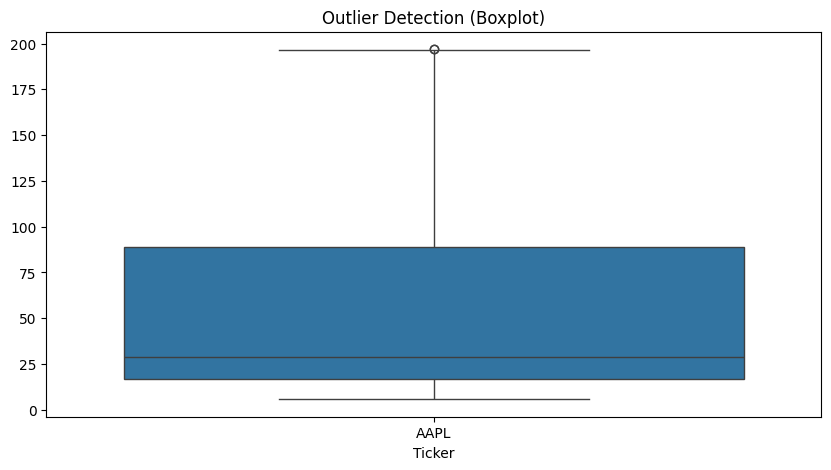

In [6]:
# Outlier Detection (Boxplot)
plt.figure(figsize=(10, 5))
sns.boxplot(data=data['Close'])
plt.title('Outlier Detection (Boxplot)')
plt.show()

In [7]:
# Outlier Detection using IQR
Q1 = data['Close'].quantile(0.25)
Q3 = data['Close'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['Close'] < (Q1 - 1.5 * IQR)) | (data['Close'] > (Q3 + 1.5 * IQR))]
print(f"\nNumber of Outliers Detected: {len(outliers)}")


Number of Outliers Detected: 3522


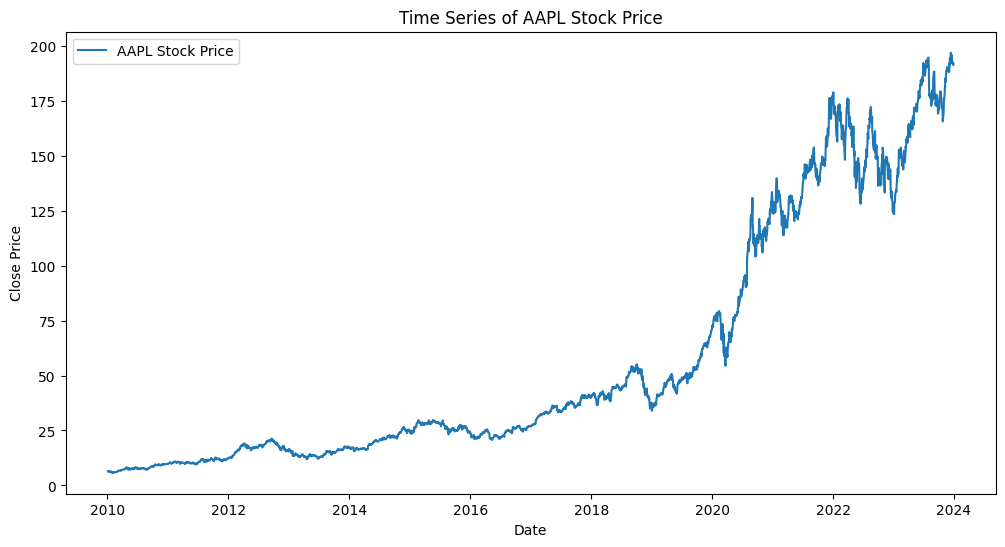

In [8]:
# Time Series Plot
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label=f'{ticker} Stock Price')
plt.title(f'Time Series of {ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

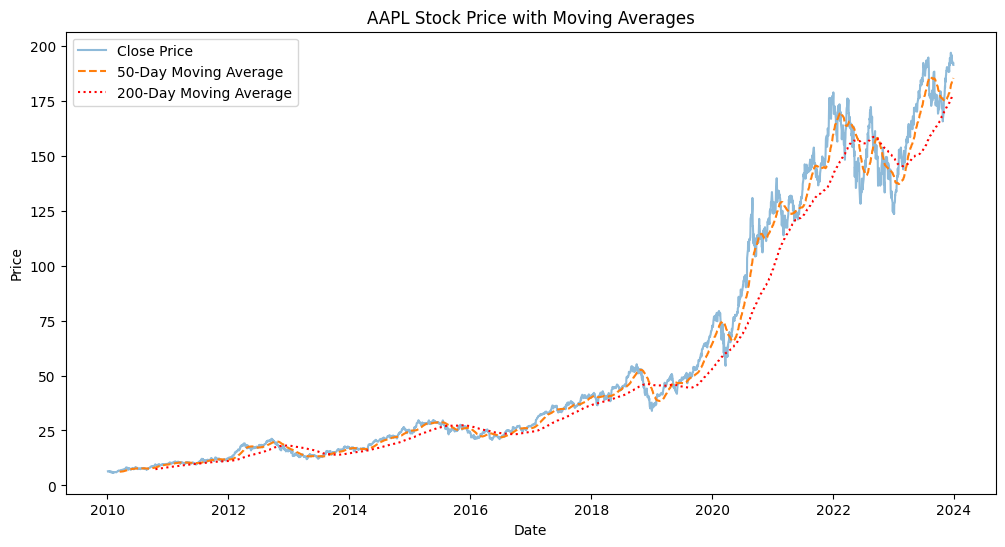

In [9]:
# Moving Averages (50-day & 200-day)
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['MA50'], label='50-Day Moving Average', linestyle='dashed')
plt.plot(data['MA200'], label='200-Day Moving Average', linestyle='dotted', color='red')
plt.title(f'{ticker} Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

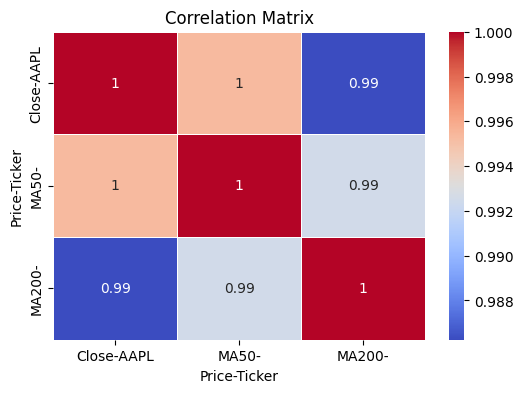

In [10]:
# Correlation Analysis (Heatmap)
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


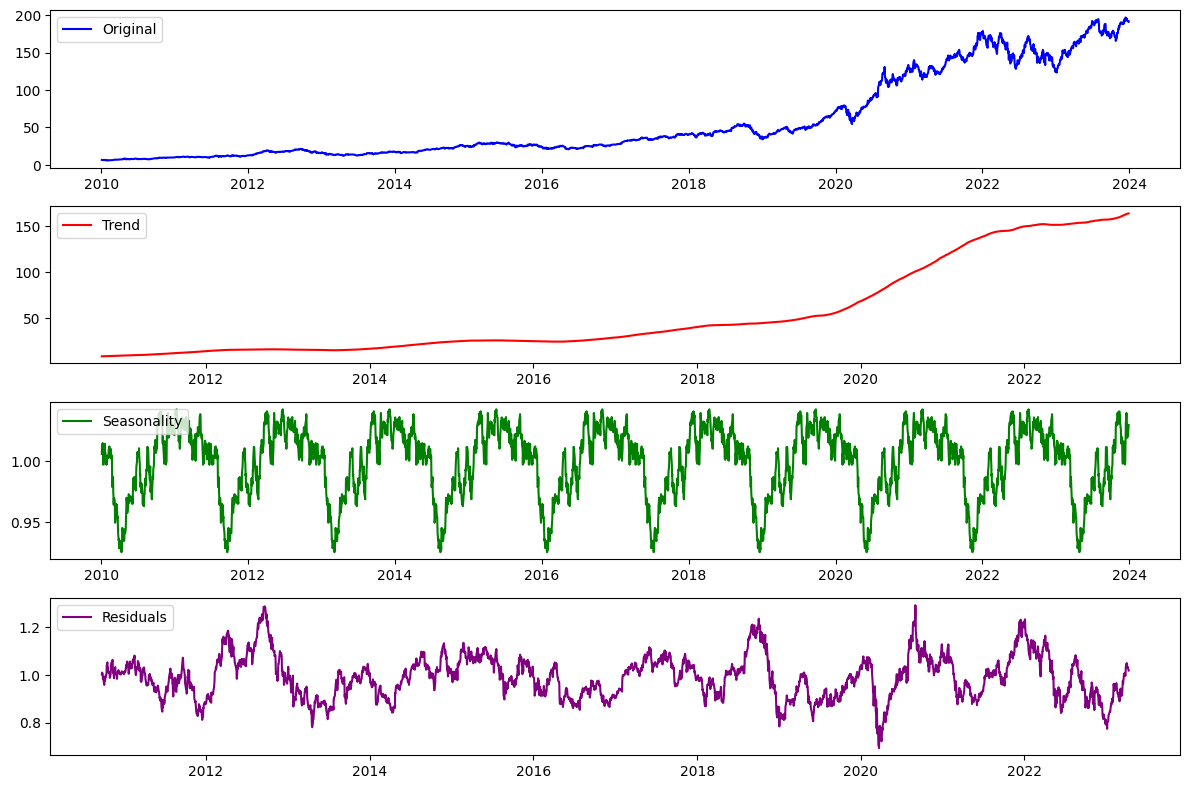

In [11]:
# Decomposing Time Series
decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=365)
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(data['Close'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='red')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='purple')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
